In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df = pd.read_csv('athlete_events.csv')
dr = pd.read_csv('rd1.csv')	
# print(df)

a2 = df[df['Season']=='Summer']
a2.to_csv("summer.csv",index = False)
ds = pd.read_csv('summer.csv')
#print(ds)

a3 = df[df['Season']=='Winter']
a3.to_csv('winter.csv', index = False)
dw = pd.read_csv('winter.csv')
#print(dw)


In [5]:
groupedYearID = df.groupby(['Year','ID'],as_index=False).count()[['Year','ID']]
groupedYearID = groupedYearID.groupby('Year',as_index=False).count()



In [6]:
l = []
for i in [1994,1998,2002,2006,2010,2014]: #The year of winter olympics
    l.append(groupedYearID[groupedYearID.Year == i].index[0])

for i in l:
    groupedYearID.loc[i,'Year'] = groupedYearID.loc[i,'Year'] +2

groupedYearID = groupedYearID.groupby('Year',as_index=False).sum()


Text(0, 0.5, 'PARTICIPANTS')

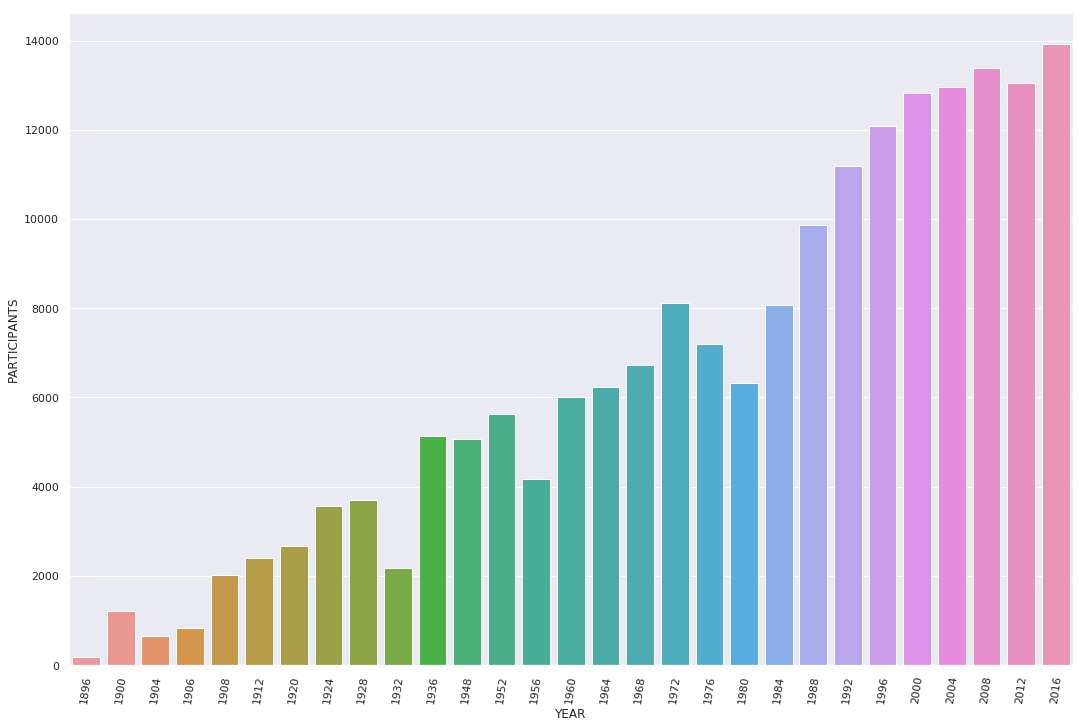

In [7]:
sns.set(rc={'figure.figsize':(18,12)})
plot1 = sns.barplot('Year','ID',data=groupedYearID).set_xticklabels(groupedYearID.Year,rotation=82)
#plot1.set(xlabel='YEAR',ylabel='Number of people')
plt.xlabel("YEAR")
plt.ylabel("PARTICIPANTS")

Text(0, 0.5, 'PARTICIPANTS')

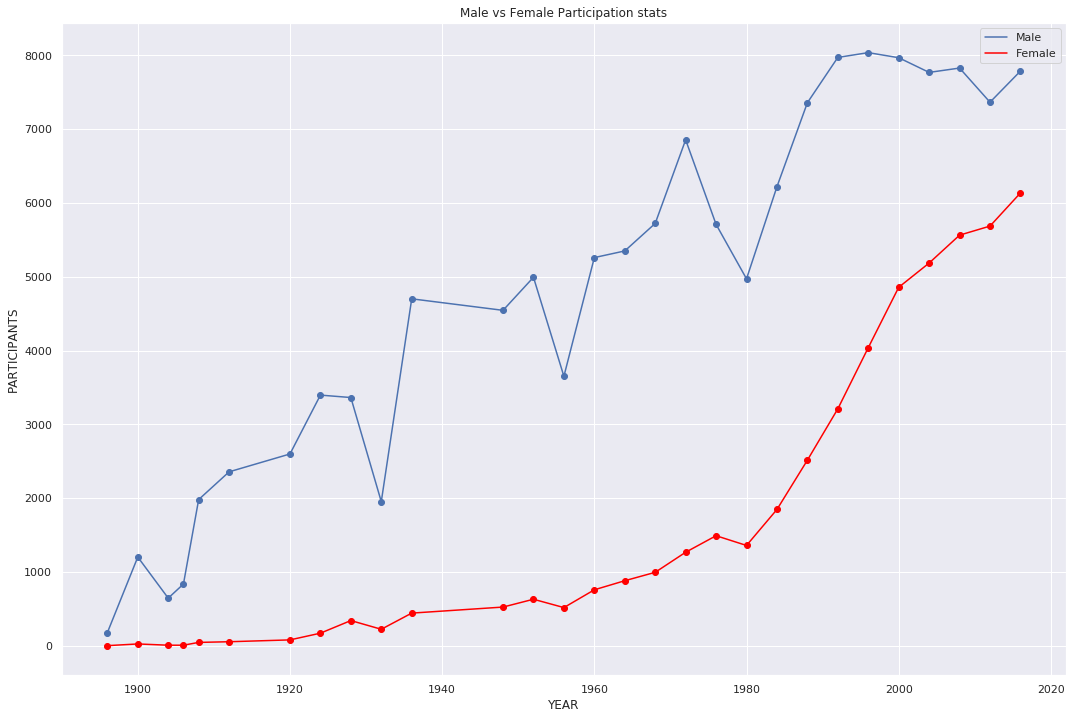

In [8]:


groupedGender = pd.concat([df,pd.get_dummies(df.Sex)],axis=1).groupby(['Year','ID'],as_index = False).sum()
groupedGender[['Year','ID','F','M']].head()

groupedGender.F = groupedGender.F.apply(lambda x: 0 if x==0 else 1)
groupedGender.M = groupedGender.M.apply(lambda x: 0 if x==0 else 1)

groupedGender = groupedGender.groupby('Year',as_index=False).sum()
for i in l:
    groupedGender.loc[i,'Year'] = groupedGender.loc[i,'Year'] +2

groupedGender = groupedGender.groupby('Year',as_index=False).sum()

plt.plot(groupedGender.Year,groupedGender.M)
plt.plot(groupedGender.Year,groupedGender.F,color='red')

plt.plot(groupedGender.Year,groupedGender.M,'bo')
plt.plot(groupedGender.Year,groupedGender.F,'bo',color ='red')

plt.legend(['Male','Female'])
plt.title("Male vs Female Participation stats")
plt.xlabel("YEAR")
plt.ylabel("PARTICIPANTS")


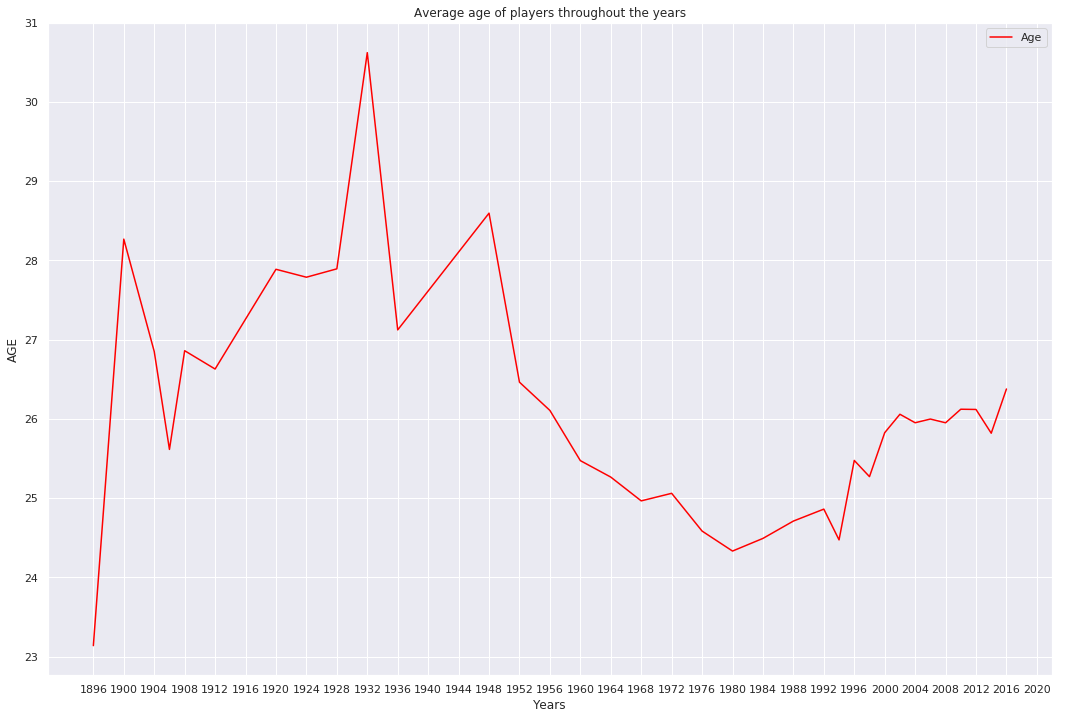

In [9]:
#Overall Average AGE
avgage = df.groupby(['Year','ID'],as_index=False).mean()
avgage = avgage.groupby('Year',as_index= False).mean()
plt.plot(avgage.Year,avgage.Age, color = 'red')
plt.title("Average age of players throughout the years")
plt.ylabel("AGE")
plt.xlabel("Years")
plt.legend()
plt.xticks(range(1896,2024,4))
plt.show()

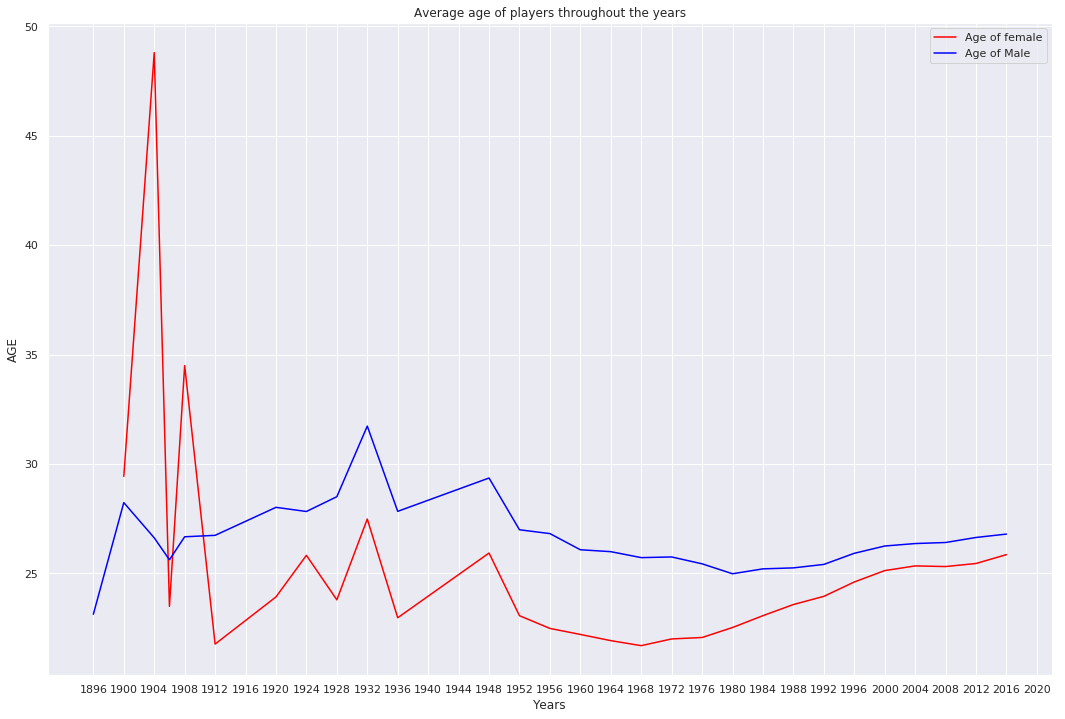

In [10]:
# female = df[df.Sex == 'F']


# avgagef = female.groupby(['Year','ID'],as_index=False).mean()
# avgagef = avgagef.groupby('Year',as_index= False).mean()
# plt.plot(avgagef.Year,avgagef.Age, color = 'red')
# plt.title("Average age of players throughout the years")
# plt.ylabel("AGE")
# plt.xlabel("Years")
# plt.legend()
# plt.xticks(range(1896,2024,4))
# plt.show()

#AVG AGE male vs Female
male = ds[ds.Sex == 'M']
female = ds[ds.Sex == 'F']


avgagem = male.groupby(['Year','ID'],as_index=False).mean()
avgagem = avgagem.groupby('Year',as_index= False).mean()

avgagef = female.groupby(['Year','ID'],as_index=False).mean()
avgagef = avgagef.groupby('Year',as_index= False).mean()

plt.plot(avgagef.Year,avgagef.Age, color = 'red',label = 'Age of female')
plt.plot(avgagem.Year,avgagem.Age, color = 'blue',label = 'Age of Male')
plt.title("Average age of players throughout the years")
plt.ylabel("AGE")
plt.xlabel("Years")
plt.legend()
plt.xticks(range(1896,2024,4))
plt.show()

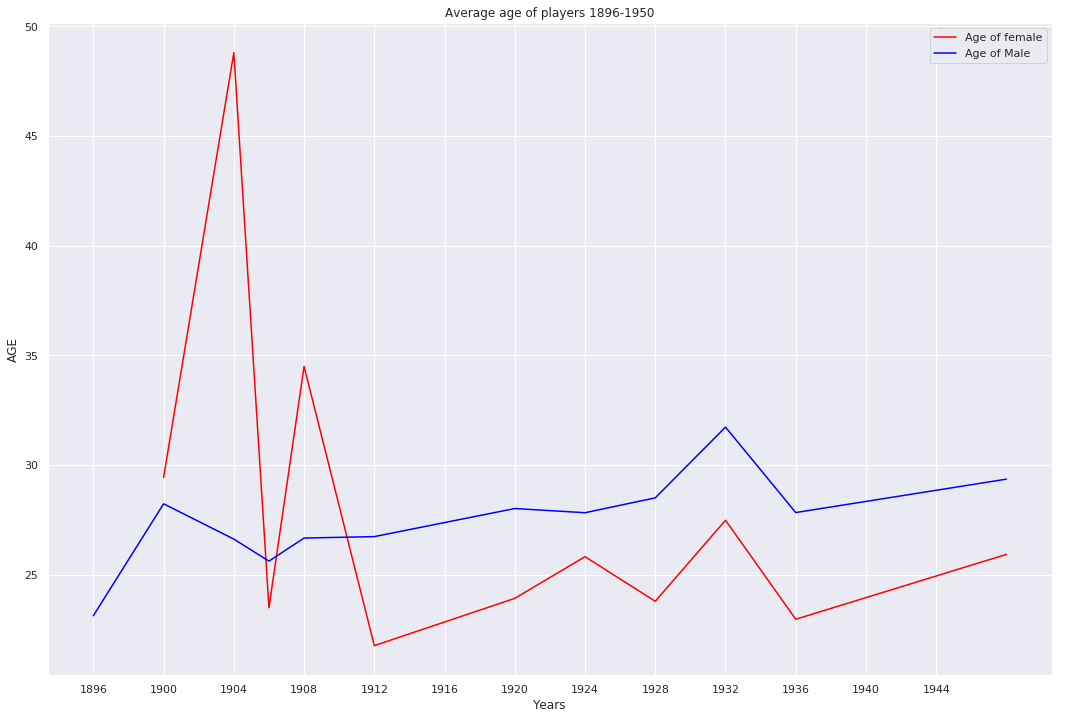

In [11]:
#Avg age 1896-1950
year = ds[ds['Year'].between(1896,1950, inclusive = True)].sort_values(['Year','Season'],ascending = False)
male = year[year.Sex == 'M']
female = year[year.Sex == 'F']


avgagem = male.groupby(['Year','ID'],as_index=False).mean()
avgagem = avgagem.groupby('Year',as_index= False).mean()



avgagef = female.groupby(['Year','ID'],as_index=False).mean()
avgagef = avgagef.groupby('Year',as_index= False).mean()



plt.plot(avgagef.Year,avgagef.Age, color = 'red', label = 'Age of female')
plt.plot(avgagem.Year,avgagem.Age, color = 'blue', label = "Age of Male")
plt.title("Average age of players 1896-1950")
plt.ylabel("AGE")
plt.xlabel("Years")
plt.legend()
plt.xticks(range(1896,1948,4))
plt.show()

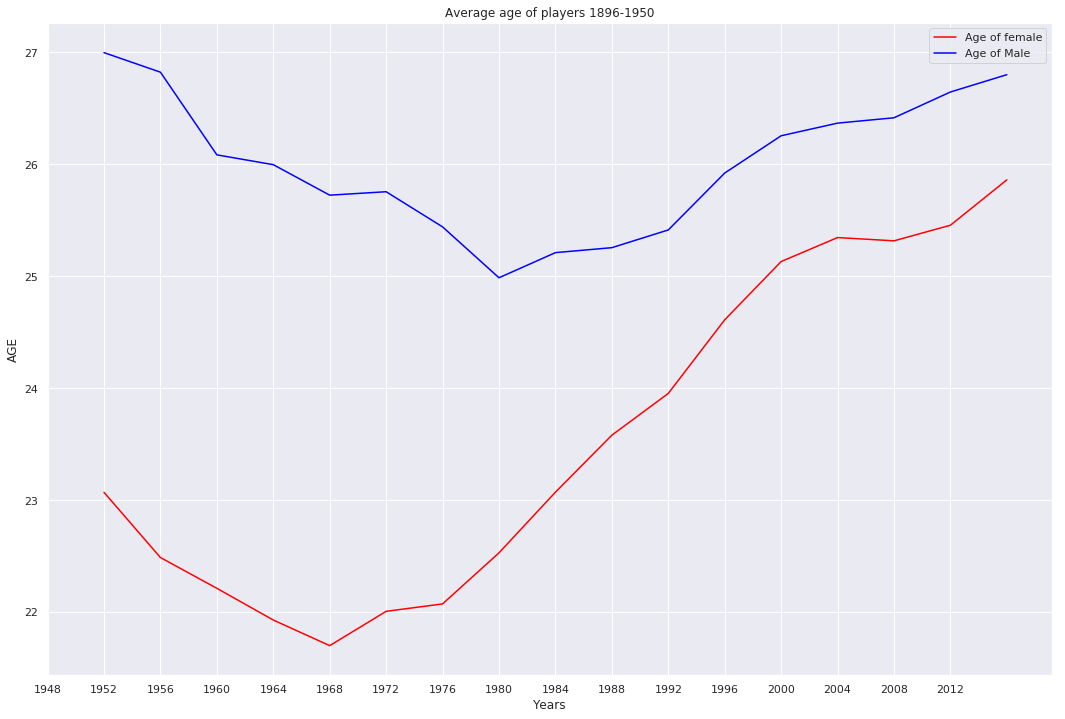

In [12]:
#AVG age 1950-2016
year = ds[ds['Year'].between(1950,2016, inclusive = True)].sort_values(['Year','Season'],ascending = False)
male = year[year.Sex == 'M']
female = year[year.Sex == 'F']


avgagem = male.groupby(['Year','ID'],as_index=False).mean()
avgagem = avgagem.groupby('Year',as_index= False).mean()



avgagef = female.groupby(['Year','ID'],as_index=False).mean()
avgagef = avgagef.groupby('Year',as_index= False).mean()



plt.plot(avgagef.Year,avgagef.Age, color = 'red', label = 'Age of female')
plt.plot(avgagem.Year,avgagem.Age, color = 'blue', label = "Age of Male")
plt.title("Average age of players 1896-1950")
plt.ylabel("AGE")
plt.xlabel("Years")
plt.legend()
plt.xticks(range(1948,2016,4))
plt.show()

In [14]:
# def fun(x,y1,y2):
#     ss=df[df['Sport']==x]
#     y1=int(y1)
#     y2=int(y2)
#     yearsplit = ss[ss['Year'].between(y1,y2, inclusive = True)].sort_values(['Year','Season'],ascending = False)
#     z=yearsplit.groupby(['Year','Sport']).agg({'Age':'mean'})
#     return z
    

# print(fun(input('Category of Sport:'),input('Start Year of Olympics:'),input('End Year of Olympics:')))



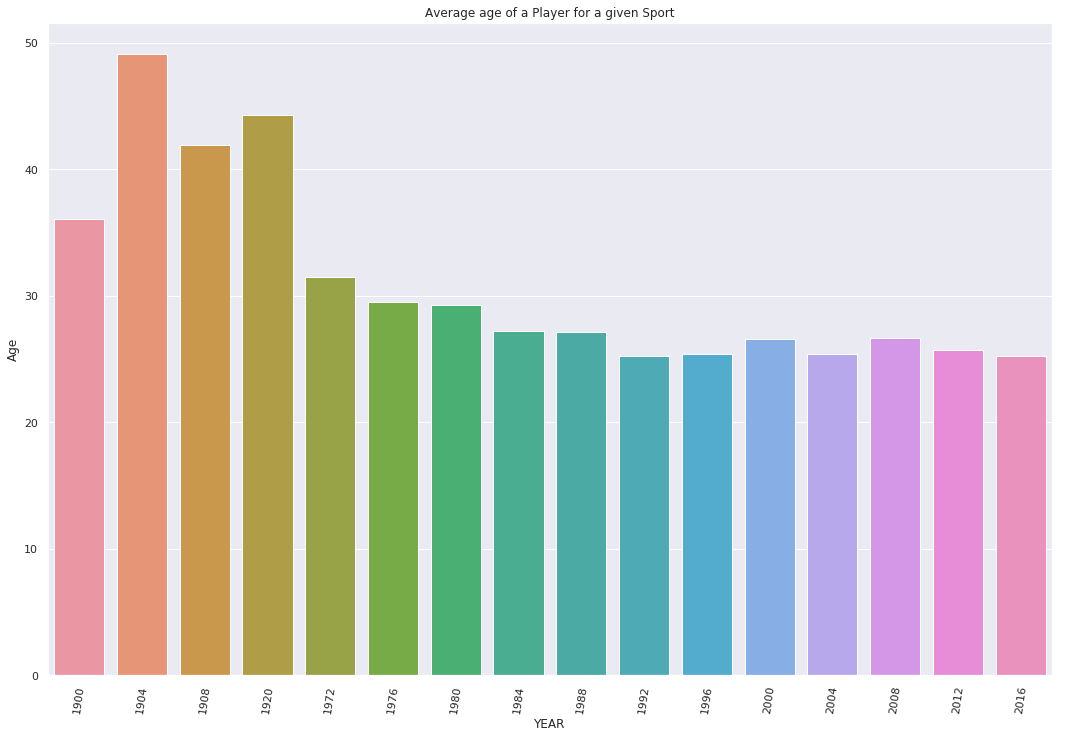

In [15]:
#Average of a player in a specfic sport

ss=df[df['Sport']=='Archery']


#
a =ss[['Year', 'Age']]
meanage = a.groupby('Year')['Age'].mean()
meanage = pd.DataFrame({'Year':meanage.index,'Age':meanage.values})
#meanage.set_index('Year', inplace = True)
sns.set(rc={'figure.figsize':(18,12)})
plot1 = sns.barplot('Year','Age',data=meanage).set_xticklabels(meanage.Year,rotation=82)
#plot1.set(xlabel='YEAR',ylabel='Number of people')
plt.xlabel("YEAR")
plt.ylabel("Age")
plt.title("Average age of a Player for a given Sport")
plt.show()

In [ ]:

corr = ds.corr()
 
# Heatmap
sns.heatmap(corr)



In [ ]:
# data_20 = data.iloc[:20,:]
# a_age  = avg['Age']*30
# family_color = data_20['Family']
# data = [
#     {
#         'y': avg['Age'],
#         'x': avg['Year'],
#         'mode': 'markers',
#         'marker': {
#             'color': family_color,
#             'size': econ_size,
#             'showscale': True
#         },
#         "text" :  data_20.Country    
#     }
# ]
# layout = dict(title='Freedom vs Happiness Rank: Size=Economy, Color=Family',
#               xaxis=dict(title='Happiness Rank'),
#               yaxis=dict(title='Freedom'))
# fig = go.Figure(data=data,layout=layout)
# iplot(fig)

In [ ]:
# x= avg['Age']
# trace1 = go.Scatter(
#     x=x,
#     y=data['Economy..GDP.per.Capita.'],
#     name = "economy"
# )
# trace2 = go.Scatter(
#     x=x,
#     y=data['Family'],
#     xaxis='x2',
#     yaxis='y2',
#     name = "family"
# )
# trace3 = go.Scatter(
#     x=x,
#     y=data['Health..Life.Expectancy.'],
#     xaxis='x3',
#     yaxis='y3',
#     name = 'health'
# )
# trace4 = go.Scatter(
#     x=x,
#     y=data['Freedom'],
#     xaxis='x4',
#     yaxis='y4',
#     name = "freedom"
# )
# data = [trace1, trace2, trace3, trace4]
# layout = go.Layout(
#     xaxis=dict(
#         domain=[0, 0.45]
#     ),
#     yaxis=dict(
#         domain=[0, 0.45]
#     ),
#     xaxis2=dict(
#         domain=[0.55, 1]
#     ),
#     xaxis3=dict(
#         domain=[0, 0.45],
#         anchor='y3'
#     ),
#     xaxis4=dict(
#         domain=[0.55, 1],
#         anchor='y4'
#     ),
#     yaxis2=dict(
#         domain=[0, 0.45],
#         anchor='x2'
#     ),
#     yaxis3=dict(
#         domain=[0.55, 1]
#     ),
#     yaxis4=dict(
#         domain=[0.55, 1],
#         anchor='x4'
#     ),
#     title = 'economy-health-family-freedom vs happiness rank'
# )
# fig = go.Figure(data=data, layout=layout)
# iplot(fig)

In [ ]:
#INDIA
# groupedGender = pd.concat([ds,pd.get_dummies(ds.Sex)],axis=1).groupby(['Year','Team','ID'],as_index = False).sum()
# groupedGender[['Year','Team','ID','F','M']].head()

# dfind = groupedGender[groupedGender.Team == 'India']


# dfind = dfind.groupby(['Year'],as_index=False).sum()

# dfind

# plt.plot(dfind.Year,dfind.M)
# plt.plot(dfind.Year,dfind.F,color='red')

# plt.plot(dfind.Year,dfind.M,'bo')
# plt.plot(dfind.Year,dfind.F,'bo',color ='red')

# plt.legend(['Male','Female'])
# plt.xlabel("YEAR")
# plt.ylabel("PARTICIPANTS")